## Feature importance and analysis 

In [62]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_feather('data/covid19_data')
df['Province_State'] = df['Province_State'].astype(str)
df['Country_Region'] = df['Country_Region'].astype(str)
for c in df:
    if df[c].dtype == 'bool':
        df[c] = df[c].astype('int')

In [64]:
encoders = {}
for col in df:
    if df[col].dtype == 'object':
        lm = LabelEncoder()
        lm.fit(df[col])
        encoders[col] = lm
        df[col] = lm.transform(df[col])

In [65]:
df['Country_Region'].describe()

count    22644.000000
mean        95.163399
std         58.640210
min          0.000000
25%         36.000000
50%         91.500000
75%        165.000000
max        179.000000
Name: Country_Region, dtype: float64

In [66]:
df

,Province_State,Country_Region,Date,weekday,day,Density,Population,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,...,Health_exp_per_capita_USD_2016_NA,per_capita_exp_PPP_2016_NA,External_health_exp_pct_2016_NA,Physicians_per_1000_2009-18_NA,Nurse_midwife_per_1000_2009-18_NA,Specialist_surgical_per_1000_2008-18_NA,Completeness_of_birth_reg_2009-18_NA,Completeness_of_death_reg_2008-16_NA,ConfirmedCases,Fatalities
0,81,0,2020-01-22,2,22,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
1,81,0,2020-01-23,3,23,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
2,81,0,2020-01-24,4,24,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
3,81,0,2020-01-25,5,25,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
4,81,0,2020-01-26,6,26,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22639,81,179,2020-03-31,1,91,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,8.0,1.0
22640,81,179,2020-04-01,2,92,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,8.0,1.0
22641,81,179,2020-04-02,3,93,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,9.0,1.0
22642,81,179,2020-04-03,4,94,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,9.0,1.0


In [67]:
ind = np.argsort(df['Date'])
df = df.iloc[ind]
df = df.drop('Date', axis=1)

In [68]:
df.reset_index().to_feather('data/clean_train')

In [69]:
y1, df = df['ConfirmedCases'], df.drop('ConfirmedCases', axis=1)
y2, df = df['Fatalities'], df.drop('Fatalities', axis=1)

In [70]:
lgb.fit()

AttributeError: module 'lightgbm' has no attribute 'fit'

In [71]:
reg = lgb.LGBMRegressor(n_estimators=20)

In [23]:
reg.fit(df, y1)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [44]:
feature_imp = pd.DataFrame({'columns':df.columns, 'importance':reg.feature_importances_}
                       ).sort_values('importance', ascending=False)

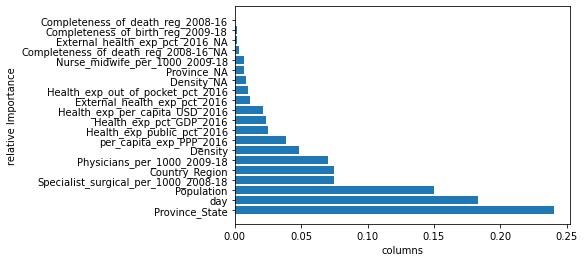

In [58]:
plt.barh(feature_imp[:20]['columns'],feature_imp[:20]['importance']/sum(feature_imp[:20]['importance']))
plt.xlabel('columns')
plt.ylabel('relative Importance')
plt.show()

In [59]:
from scipy.cluster import hierarchy as hc
import scipy

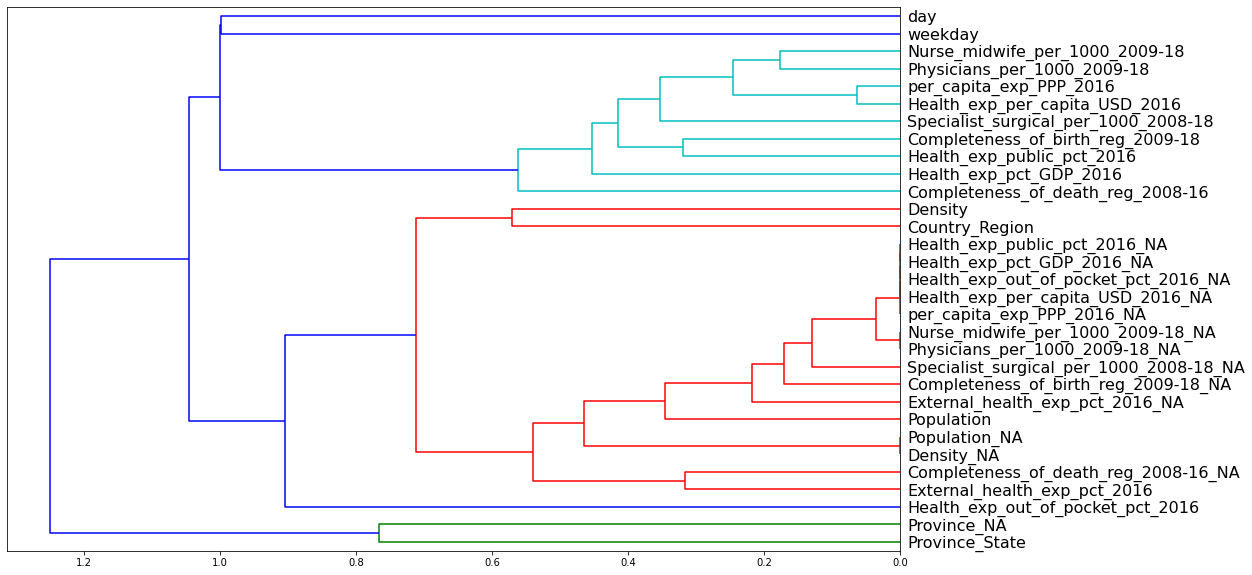

In [60]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()